In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data= "data/city_data.csv"
ride_data= "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
all_df = city_df.merge(ride_df)


# Display the data table for preview
all_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Calculate Type Percents 
city_group_df = pd.DataFrame(all_df)
city_group_df = city_group_df.groupby(["type", "city"])
city_fare_df = round(city_group_df.fare.agg(["count","mean"]),0)
city_fare_df.columns = ["Number of Rides", "Average Fare per Ride"]
city_fare_df["% of Total Rides"] = round(city_fare_df["Number of Rides"] / sum(city_fare_df["Number of Rides"]) * 100, 2)
city_fare_df["% of Total Fares"] = round(city_fare_df["Average Fare per Ride"] / sum(city_fare_df["Average Fare per Ride"]) * 100, 2)
city_fare_df.head(5)

Number of Rides  Average Fare per Ride  \
type  city                                                     
Rural Bradshawfurt                 10                   40.0   
      Garzaport                     3                   24.0   
      Harringtonfort                6                   33.0   
      Jessicaport                   6                   36.0   
      Lake Jamie                    6                   34.0   

                      % of Total Rides  % of Total Fares  
type  city                                                
Rural Bradshawfurt                0.42              1.19  
      Garzaport                   0.13              0.72  
      Harringtonfort              0.25              0.99  
      Jessicaport                 0.25              1.07  
      Lake Jamie                  0.25              1.02

In [3]:
city_notype_df = pd.DataFrame(all_df)
city_notype_df = city_notype_df.groupby(["type"])
city_type_df = round(city_notype_df.fare.agg(["count","sum","mean"]),0)
city_type_df.columns = ["Number of Rides", "Total Revenue of Fares", "Average Fare per Ride"]
city_type_df["% of Total Rides"] = round(city_type_df["Number of Rides"] / sum(city_type_df["Number of Rides"]) * 100, 2)
city_type_df["% of Total Fares"] = round(city_type_df["Total Revenue of Fares"] / sum(city_type_df["Total Revenue of Fares"]) * 100, 2)
city_type_df.head(5)

,Number of Rides,Total Revenue of Fares,Average Fare per Ride,% of Total Rides,% of Total Fares
type,,,,,
Rural,125,4328.0,35.0,5.26,6.81
Suburban,625,19356.0,31.0,26.32,30.46
Urban,1625,39854.0,25.0,68.42,62.72


In [4]:
#split the data per city type
rural = city_fare_df.loc["Rural" , :]
urban = city_fare_df.loc["Urban" , :]
suburban = city_fare_df.loc["Suburban" , :]

drive1_df = pd.DataFrame(all_df)
drive2_df = drive1_df.drop_duplicates("city")
driver_count = drive2_df["driver_count"]

## Bubble Plot of Ride Sharing Data

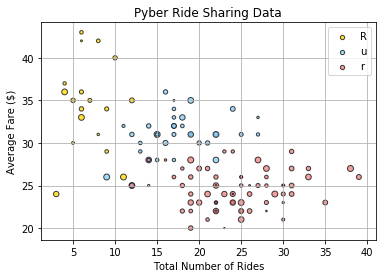

In [5]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types
x_axis1 = rural["Number of Rides"]
data1 = rural["Average Fare per Ride"]
x_axis2 = suburban["Number of Rides"]
data2 = suburban["Average Fare per Ride"]
x_axis3 = urban["Number of Rides"]
data3 = urban["Average Fare per Ride"]

# Incorporate the other graph properties
plt.scatter(x_axis1, data1, marker="o", color="gold", edgecolors="black",
            s=driver_count*.5, alpha=0.75)

plt.scatter(x_axis2, data2, marker="o", color="lightskyblue", edgecolors="black",
            s=driver_count*.5, alpha=0.75)

plt.scatter(x_axis3, data3, marker="o", color="lightcoral", edgecolors="black",
            s=driver_count*.5, alpha=0.75)
# Create a legend
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")
plt.legend('Rural, Suburban , Urban')
plt.grid()
# Incorporate a text label regarding circle size

# Save Figure
# Tells matplotlib that we want to make a scatter plot


plt.show()

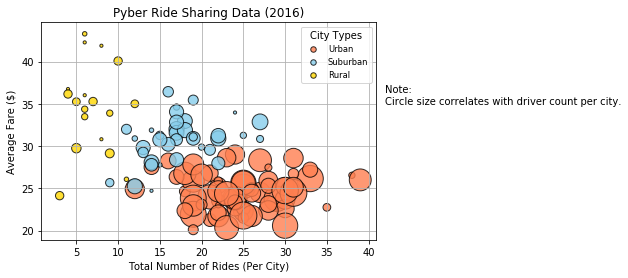

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

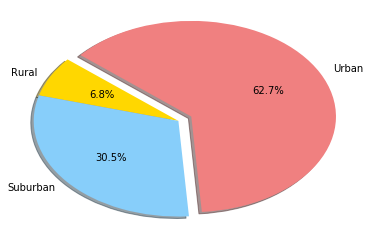

In [6]:
# Calculate Type Percents 
city_group_df = pd.DataFrame(all_df)
city_group_df = city_group_df.groupby(["type", "city"])
city_fare_df = round(city_group_df.fare.agg(["count","mean"]),0)
city_fare_df.columns = ["Number of Rides", "Average Fare per Ride"]
city_fare_df["% of Total Rides"] = round(city_fare_df["Number of Rides"] / sum(city_fare_df["Number of Rides"]) * 100, 2)
city_fare_df["% of Total Fares"] = round(city_fare_df["Average Fare per Ride"] / sum(city_fare_df["Average Fare per Ride"]) * 100, 2)
city_fare_df.head(5)

# Build Pie Chart
plt.title = 'Total Fares by City Type'
plt.labels = city_type_df.index.values
plt.sizes = city_type_df["% of Total Fares"]
plt.colors = ['gold','lightskyblue','lightcoral']
plt.explode = [0,0,0.1]
plt.pie(plt.sizes, plt.explode, plt.labels, plt.colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("tight")
plt.show()

## Total Rides by City Type

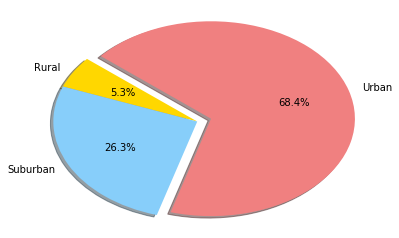

In [7]:
# Calculate Ride Percents
city_notype_df = pd.DataFrame(all_df)
city_notype_df = city_notype_df.groupby(["type"])
city_type_df = round(city_notype_df.fare.agg(["count","sum","mean"]),0)
city_type_df.columns = ["Number of Rides", "Total Revenue of Fares", "Average Fare per Ride"]
city_type_df["% of Total Rides"] = round(city_type_df["Number of Rides"] / sum(city_type_df["Number of Rides"]) * 100, 2)
city_type_df["% of Total Fares"] = round(city_type_df["Total Revenue of Fares"] / sum(city_type_df["Total Revenue of Fares"]) * 100, 2)
city_type_df.head(5)
# Build Pie Chart
plt.title = ("Total Fares by City Type")
plt.labels = city_type_df.index.values
plt.sizes = city_type_df["% of Total Rides"]
plt.colors = ['gold','lightskyblue','lightcoral']
plt.explode = [0,0,0.1]
plt.pie(plt.sizes, plt.explode, plt.labels, plt.colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("tight")
plt.show()
# Save Figure


## Total Drivers by City Type

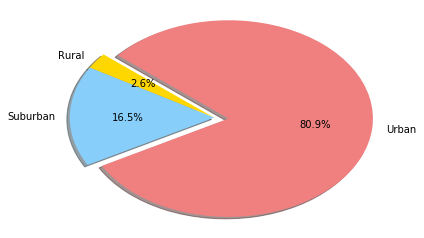

In [8]:
# Calculate Driver Percents
driver_df = pd.DataFrame(all_df)
driver_drop_df = driver_df.drop_duplicates("city")
driver_drop_df.head(126)
driver_drop_df = driver_drop_df.groupby("type")
driver_drop_df.head(200)
driver_count_df = driver_drop_df.driver_count.agg(["sum", "count"])
driver_count_df.columns = ["Drivers by City Type", "City Count"]
driver_count_df["% of Drivers Count"] = round(driver_count_df["Drivers by City Type"] / sum(driver_count_df["Drivers by City Type"]) * 100, 2)
driver_count_df
# Build Pie Charts
plt.labels = driver_count_df.index.values
plt.sizes = driver_count_df["% of Drivers Count"]
plt.colors = ['gold','lightskyblue','lightcoral']
plt.explode = [0,0,0.1]
plt.pie(plt.sizes, plt.explode, plt.labels, plt.colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("tight")
plt.show()
# Save Figure
